Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
# Importing all Libraries and packages to be used:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical
from google.colab import drive
from __future__ import print_function
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical
from tensorflow.keras.regularizers import l2

import warnings
warnings.filterwarnings("ignore")

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive/')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
# Adding paths to google drive folders with train and test data.
data_dir_train = pathlib.Path('gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
# Count the number of images in Train data and Test Data:
# Train
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
# Test
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
# Settiing up loader parameters:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

### PLEASE NOTE: Upon runing the notebook again due to the augmentor class rebalance the no of files changed:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, validation_split = 0.2, subset = "training", seed=123,image_size=(img_height, img_width), batch_size = batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [67]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
### PLEASE NOTE: Upon runing the notebook again due to the augmentor class rebalance the no of files changed:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,validation_split = 0.2,subset = "validation", seed=123,image_size=(img_height, img_width), batch_size = batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [68]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

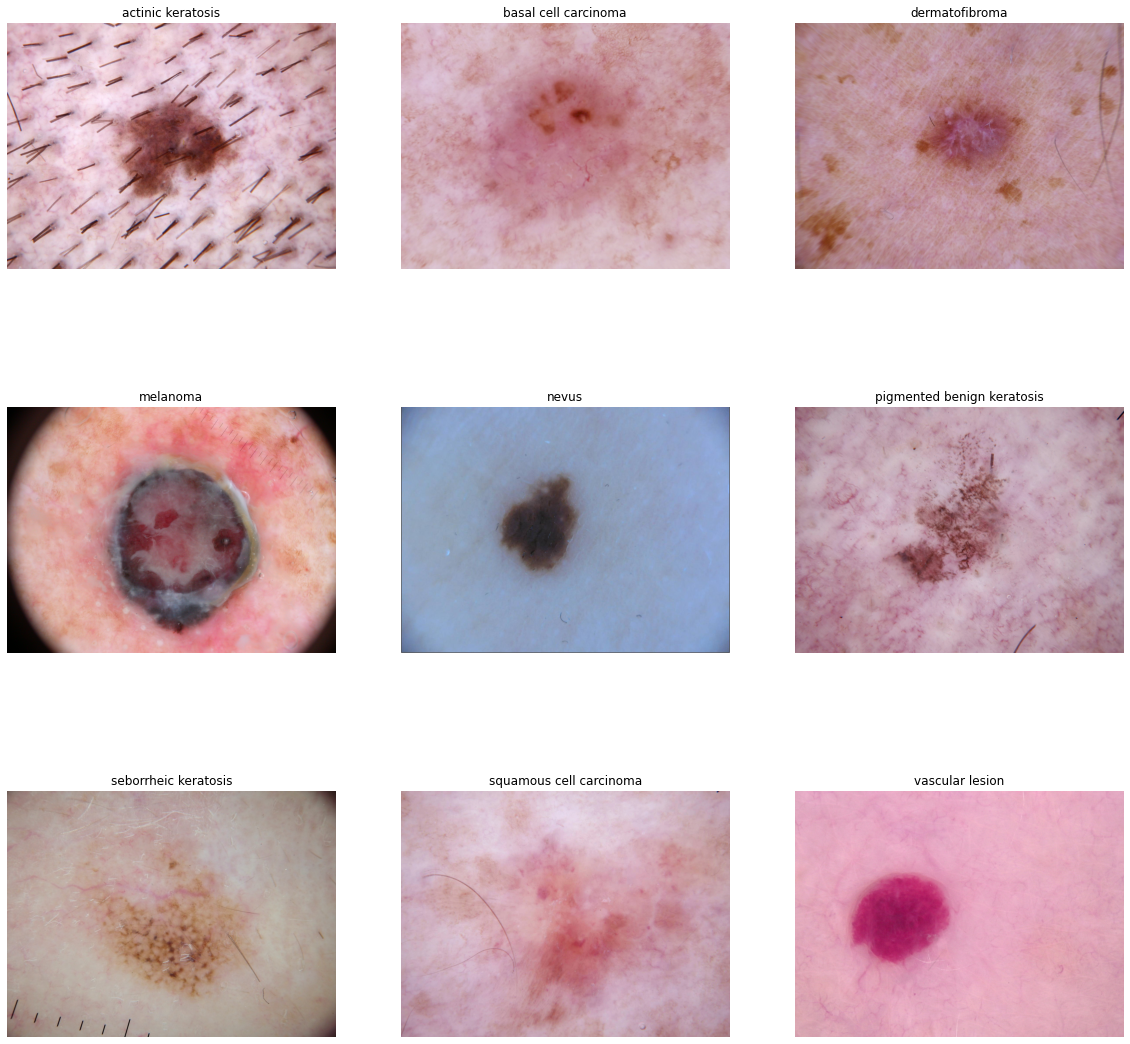

In [9]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
import matplotlib.image as mpimg
plt.figure(figsize=(20,20))
for index,name in enumerate(class_names):
   ax=plt.subplot(3,3,index+1)
   images=list(data_dir_train.glob(name+'/*'))
   img=mpimg.imread((str(images[0])))
   plt.imshow(img)
   plt.title(name)
   plt.axis('off')

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
# Applying the above instructions: 
reprocessing_layers = [tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3))]

In [13]:
# Creating the First Sequential CNN Model
# Input images shape:
input_shape = (img_height,img_width,3)

activ = 'relu'
model = Sequential()    
#1st Convolution Layer
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=input_shape))
model.add(Conv2D(16,kernel_size=(3,3),activation=activ,padding ='same'))
model.add(MaxPool2D())

#2nd Convolution Layer
model.add(Conv2D(32,kernel_size=(3,3),activation=activ,padding ='same'))
model.add(MaxPool2D())

#3rd Convolution Layer
model.add(Conv2D(64,kernel_size=(3,3),activation=activ,padding ='same'))
model.add(MaxPool2D())

# To Flatten the multi-dimensional input tensors into a single dimension.
model.add(Flatten())

#Dense Layer
model.add(Dense(128,activation=activ))

#Dense Layer with softmax activation function.
model.add(Dense(len(class_names)))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
### Todo, choose an appropirate optimiser and loss function
from tensorflow.keras.optimizers import Adam
#Choosing Optimizer and Loss function
optimizer_chosen = 'Adam'
loss_function_chosen = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# Compling the Model:
model.compile(optimizer=optimizer_chosen,loss=loss_function_chosen,metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_1 (ModuleWra  (None, 180, 180, 16)     448       
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 90, 90, 16)       0         
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 90, 90, 32)       4640      
 pper)                                                           
                                                                 
 module_wrapper_4 (ModuleWra  (None, 45, 45, 32)       0         
 pper)                                                

### Train the model

In [16]:
# Training the model: 
epochs = 20
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20
56/56 [==============================] - 19s 82ms/step - loss: 2.1067 - accuracy: 0.2243 - val_loss: 1.9493 - val_accuracy: 0.2998
Epoch 2/20
56/56 [==============================] - 1s 26ms/step - loss: 1.7148 - accuracy: 0.3996 - val_loss: 1.5557 - val_accuracy: 0.4720
Epoch 3/20
56/56 [==============================] - 1s 24ms/step - loss: 1.4479 - accuracy: 0.4989 - val_loss: 1.4124 - val_accuracy: 0.5078
Epoch 4/20
56/56 [==============================] - 1s 24ms/step - loss: 1.4023 - accuracy: 0.5061 - val_loss: 1.3666 - val_accuracy: 0.5324
Epoch 5/20
56/56 [==============================] - 1s 25ms/step - loss: 1.2980 - accuracy: 0.5469 - val_loss: 1.3914 - val_accuracy: 0.5414
Epoch 6/20
56/56 [==============================] - 1s 25ms/step - loss: 1.1975 - accuracy: 0.5770 - val_loss: 1.3716 - val_accuracy: 0.5213
Epoch 7/20
56/56 [==============================] - 1s 25ms/step - loss: 1.1767 - accuracy: 0.5859 - val_loss: 1.4036 - val_accuracy: 0.5391
Epoch 8/20
5

### Visualizing training results

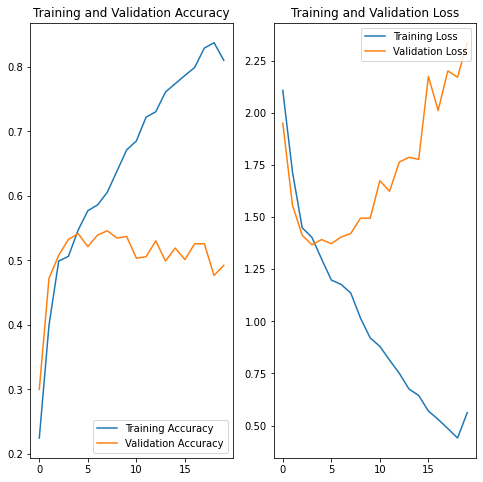

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

## Findings:
> **It could be infered that as the trining accuracy increases with epoches the the difference between validation accuracy (0.49) and training accuracy(0.81) increases significantly after 6-8 epoches thus this is a clear sign of model -n - overfitting**

In [18]:
  # Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
# Augumentation strategy:
  # Random Image Flipping Sides, Rotation,Zoom to all images during training:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

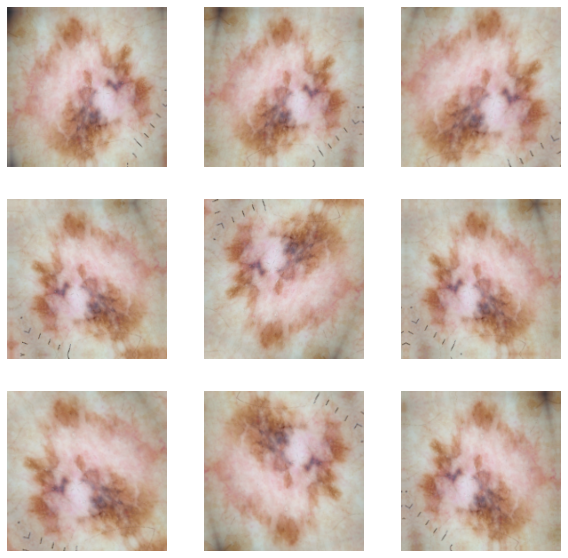

In [19]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
#Showing how the Augmentation strategy applied works:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):   
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")  

### Todo:
### Create the model, compile and train the model


In [20]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
## 2nd CNN Model with a dropout layers as overfitting had been detected:

model2 = Sequential([data_augmentation,layers.Rescaling(1./255),                     #2nd Sequential model, Augmentation Strategy, Rescaling Layer)

#1st Convulation Layer
layers.Conv2D(16,kernel_size=(3,3),activation='relu',padding='same'),
layers.MaxPool2D(),

#2nd Convulation Layer
layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'),
layers.MaxPool2D(),

#3rd Convulation Layer
layers.Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'),
layers.MaxPool2D(),

#Dropout layer with 25% Fraction of the input units to drop.
layers.Dropout(0.25),

#Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
layers.Flatten(),
#Dense Layer
layers.Dense(128,activation='relu'),

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
layers.Dense(len(class_names),activation='softmax')
])

### Compiling the model

In [21]:
## Your code goes here
# Compling the Model:
model2.compile(optimizer=optimizer_chosen,loss=loss_function_chosen,metrics=['accuracy'])

### Training the model

In [22]:
## Your code goes here, note: train your model for 20 epochs
epochs =20
history = model2.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/20
56/56 [==============================] - 4s 55ms/step - loss: 2.1427 - accuracy: 0.2188 - val_loss: 1.9883 - val_accuracy: 0.2215
Epoch 2/20
56/56 [==============================] - 3s 53ms/step - loss: 1.8162 - accuracy: 0.3415 - val_loss: 1.7160 - val_accuracy: 0.3669
Epoch 3/20
56/56 [==============================] - 3s 52ms/step - loss: 1.6286 - accuracy: 0.4180 - val_loss: 1.6526 - val_accuracy: 0.4251
Epoch 4/20
56/56 [==============================] - 3s 52ms/step - loss: 1.5749 - accuracy: 0.4431 - val_loss: 1.6487 - val_accuracy: 0.4519
Epoch 5/20
56/56 [==============================] - 3s 52ms/step - loss: 1.4882 - accuracy: 0.4710 - val_loss: 1.4352 - val_accuracy: 0.5034
Epoch 6/20
56/56 [==============================] - 3s 51ms/step - loss: 1.4004 - accuracy: 0.4989 - val_loss: 1.4349 - val_accuracy: 0.5235
Epoch 7/20
56/56 [==============================] - 3s 52ms/step - loss: 1.3463 - accuracy: 0.5184 - val_loss: 1.4209 - val_accuracy: 0.5145
Epoch 8/20
56

### Visualizing the results

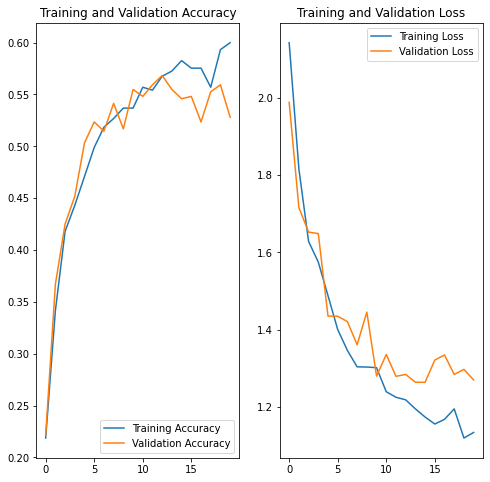

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

## Findings:
> **As we can see the model is no longer overfitting the differnce between validation accuracy (0.53) and training accuracy (0.60) decreased significantly.** <br>
> **The model is not under fitting as the accuracy of validation and training are below 70%**

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [27]:
## Your code goes here.
## Total number of images in dataset:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
from glob import glob
path_list = [ x for x in glob(os.path.join(data_dir_train, '*', '*.jpg')) ] 
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
print(len(lesion_list))

2239
2239


In [40]:
ds_ref = dict(zip(path_list, lesion_list))
print(list(ds_ref.items())[:2])
ds_uniqueclass = pd.DataFrame(list(ds_ref.items()), columns=['Path','Label'])
ds_uniqueclass.head()
ds_uniqueclass[['Label']].value_counts()

[('gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/ISIC_0010923.jpg', 'seborrheic keratosis'), ('gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/ISIC_0010883.jpg', 'seborrheic keratosis')]


Label                     
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
dtype: int64

In [41]:
ds_uniqueclass[['Label']].value_counts(normalize=True)

Label                     
pigmented benign keratosis    0.206342
melanoma                      0.195623
basal cell carcinoma          0.167932
nevus                         0.159446
squamous cell carcinoma       0.080840
vascular lesion               0.062081
actinic keratosis             0.050916
dermatofibroma                0.042430
seborrheic keratosis          0.034390
dtype: float64

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
> **Seborrheic keratosis has the least number of samples across all classes only 77 smaples out of 2239 images:**<br>
#### - Which classes dominate the data in terms proportionate number of samples?
> **Pigmented benign keratosis has 462 samples and dominates the data**



#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [42]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [43]:
path_to_training_dataset=str(data_dir_train)+'/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8EC4926160>: 100%|██████████| 500/500 [00:25<00:00, 19.95 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8EC48F3280>: 100%|██████████| 500/500 [00:20<00:00, 24.47 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8EC4960160>: 100%|██████████| 500/500 [00:19<00:00, 25.86 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F8EC489EF70>: 100%|██████████| 500/500 [01:31<00:00,  5.45 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F8EC495FA90>: 100%|██████████| 500/500 [01:32<00:00,  5.40 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F8EC4855A30>: 100%|██████████| 500/500 [00:18<00:00, 27.63 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F8EC4905430>: 100%|██████████| 500/500 [00:42<00:00, 11.74 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8EC4919280>: 100%|██████████| 500/500 [00:18<00:00, 26.65 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8EC48B3B20>: 100%|██████████| 500/500 [00:19<00:00, 26.31 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [44]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [50]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[:5]

['gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010993.jpg_5820b6a4-f80d-4bb7-b2b9-e71d5d76ee22.jpg',
 'gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011138.jpg_53babafd-cf5e-490a-a04c-d869f40d4092.jpg',
 'gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010942.jpg_a287abcf-ff14-4ce7-bda2-c049e74bb569.jpg',
 'gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011126.jpg_eeeb585d-22bf-49ab-9334-13466a29f174.jpg',
 'gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010900.jpg_3a60b6d6-ea7b-431a-8d8d

In [49]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:5]

['seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis']

In [48]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [51]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = ds_uniqueclass.append(df2)

In [52]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [53]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [54]:
data_dir_train=data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', #Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),batch_size=batch_size
  )

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [55]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [57]:
## your code goes here

## 3rd CNN Model with a dropout layer augmentor and normalization:
number_of_classes = 9
activ='relu'
model3 = Sequential([
# Augmentation
  data_augmentation,
# Normalization and Rescaling
  layers.Rescaling(1./255),
#1st Convulation Layer
  layers.Conv2D(16, 3, padding='same', activation=activ),
  layers.MaxPooling2D(),
#2nd Convulation Layer
  layers.Conv2D(32, 3, padding='same', activation=activ),
  layers.MaxPooling2D(),
#3rd Convulation Layer
  layers.Conv2D(64, 3, padding='same', activation=activ),
  layers.MaxPooling2D(),
#Dropout layer with 25% Fraction of the input units to drop.
  layers.Dropout(0.2),
# Flatten Layer
  layers.Flatten(),
#Dense Layers
  layers.Dense(128, activation=activ),
  layers.Dense(64, activation=activ),
  layers.Dense(number_of_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [58]:
## your code goes here
model3.compile(optimizer=optimizer_chosen,loss=loss_function_chosen,metrics=['accuracy'])

#### **Todo:**  Train your model

In [59]:
#epochs = 30
## Your code goes here, use 50 epochs.
# 50 Epoches
epochs =50
history = model2.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)# your model fit code

Epoch 1/50
169/169 [==============================] - 38s 215ms/step - loss: 1.2778 - accuracy: 0.5117 - val_loss: 1.2257 - val_accuracy: 0.5056
Epoch 2/50
169/169 [==============================] - 41s 236ms/step - loss: 1.2051 - accuracy: 0.5339 - val_loss: 1.2132 - val_accuracy: 0.5330
Epoch 3/50
169/169 [==============================] - 36s 210ms/step - loss: 1.1705 - accuracy: 0.5495 - val_loss: 1.1514 - val_accuracy: 0.5605
Epoch 4/50
169/169 [==============================] - 36s 208ms/step - loss: 1.1383 - accuracy: 0.5644 - val_loss: 1.1343 - val_accuracy: 0.5865
Epoch 5/50
169/169 [==============================] - 36s 208ms/step - loss: 1.0780 - accuracy: 0.5885 - val_loss: 1.1069 - val_accuracy: 0.5746
Epoch 6/50
169/169 [==============================] - 36s 208ms/step - loss: 1.0847 - accuracy: 0.5857 - val_loss: 1.0734 - val_accuracy: 0.5909
Epoch 7/50
169/169 [==============================] - 37s 215ms/step - loss: 1.0844 - accuracy: 0.5883 - val_loss: 1.0436 - val_ac

#### **Todo:**  Visualize the model results

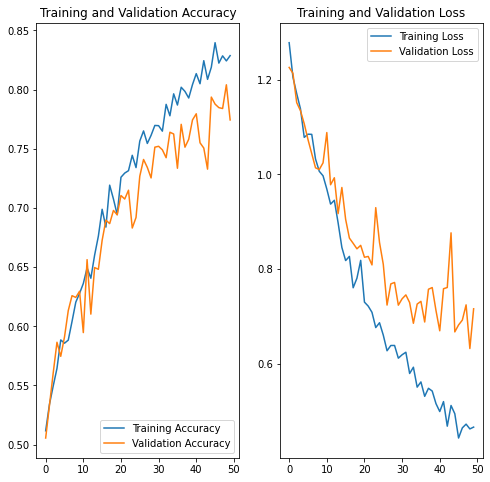

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



## In Model 3 after implmenting the augmentation strategy and class rebalance as well as drop out layes we can infer the following:
> **Training and Validation accuracy jumps from 0.6 to 0.83 and from 0.53 to 0.77 after class rebalance.** <br>
> **No more model overfitting or underfitting as the difference between the training accuracy and validation accuracy is small (5.4%)**

# Analysis:

## Model 1 Normalization only (Overfitting)
accuracy: 0.8103 - val_loss: 2.3355 - val_accuracy: 0.4922
## Model 2 Aumentation Strategy (Class imbalance of dataset)
accuracy: 0.5999 - val_loss: 1.2700 - val_accuracy: 0.5280
## Model 3 Augmentation + Class Rebalance (Final Model with 0.83 accuracy)
accuracy: 0.8286 - val_loss: 0.7163 - val_accuracy: 0.7743
